In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
data_rnn = pd.read_csv("https://raw.githubusercontent.com/t0ccata/final-project-ml/main/archive/daily/AALI.csv")
data_rnn['timestamp'] = pd.to_datetime(data_rnn['timestamp'])
data_rnn.set_index('timestamp', inplace=True)
data_rnn.head()

,open,low,high,close,volume
timestamp,,,,,
2001-04-16,524,524,547,547,342131
2001-04-17,547,524,571,524,345804
2001-04-18,547,524,547,524,230361
2001-04-19,524,500,524,500,457574
2001-04-20,476,452,476,452,228262


In [ ]:
data_rnn.isna().sum()

open      0
low       0
high      0
close     0
volume    0
dtype: int64

In [ ]:
scaler = MinMaxScaler()
data_rnn_scaled = scaler.fit_transform(data_rnn)

In [ ]:
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length, 3])
    return np.array(sequences), np.array(targets)

In [ ]:
seq_length = 60
X_train, y_train = create_sequences(data_rnn_scaled, seq_length) # Use the correct variable name here

In [ ]:
seq_length = 60
sequences, y_train = create_sequences(data_rnn_scaled, seq_length) # Use the correct variable name 'data_rnn_scaled'
sequences = sequences.reshape(sequences.shape[0], seq_length, data_rnn.shape[1])

In [ ]:
!pip install keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu')) # Use LSTM layer to handle time series data
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
# Assuming 'data_rnn_scaled' contains both training and test data
# Adjust the split index based on your data
split_index = int(len(data_rnn_scaled) * 0.8)  # Example 80/20 split

# Training data
data_train = data_rnn_scaled[:split_index]
X_train, y_train = create_sequences(data_train, seq_length)
X_train = X_train.reshape(X_train.shape[0], seq_length, data_rnn_scaled.shape[1])

# Test data
data_test = data_rnn_scaled[split_index:]
X_test, y_test = create_sequences(data_test, seq_length)
X_test = X_test.reshape(X_test.shape[0], seq_length, data_rnn_scaled.shape[1])

# ... rest of my model training and prediction code ...

In [ ]:
# Reshape 'train_predictions' to be two-dimensional
train_predictions = train_predictions.reshape(-1, 1)

# Combine train and test predictions and actual values
combined_train_test_predictions = np.concatenate((train_predictions, test_predictions), axis=0)
combined_train_test_actual = np.concatenate((y_train, y_test), axis=0) # Use y_train and y_test instead of y_train_actual and y_test_actual

In [ ]:
# Evaluate the model on normalized data
# Assuming 'y' should be your target variable for the normalized data
# Replace 'y' with the actual variable name containing your target values
mse_normalized = mean_squared_error(y_test, model.predict(X_test).reshape(-1))  # Example: using y_test if it's your test target
mape_normalized = mean_absolute_percentage_error(y_test, model.predict(X_test).reshape(-1))
r2_normalized = r2_score(y_test, model.predict(X_test).reshape(-1))

# Calculate metrics for training data
train_predictions = model.predict(X_train).reshape(-1)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Calculate metrics for test data  <--- Added this section
test_predictions = model.predict(X_test).reshape(-1)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Calculate overall metrics <--- Added this section
overall_predictions = np.concatenate((train_predictions, test_predictions), axis=0)
overall_actual = np.concatenate((y_train, y_test), axis=0)
overall_mse = mean_squared_error(overall_actual, overall_predictions)
overall_rmse = np.sqrt(overall_mse)
overall_mape = mean_absolute_percentage_error(overall_actual, overall_predictions)
overall_r2 = r2_score(overall_actual, overall_predictions)

# ... rest of my code ...

print(f'Train MSE: {train_mse:.4f}')
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Train MAPE: {train_mape:.4f}')
print(f'Train R-squared: {train_r2:.4f}')
print()
print(f'Test MSE: {test_mse:.4f}') # Now test_mse is defined
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test MAPE: {test_mape:.4f}')
print(f'Test R-squared: {test_r2:.4f}')
print()
print(f'Overall MSE: {overall_mse:.4f}') # Now overall metrics are defined
print(f'Overall RMSE: {overall_rmse:.4f}')
print(f'Overall MAPE: {overall_mape:.4f}')
print(f'Overall R-squared: {overall_r2:.4f}')
print()
print(f'Normalized Data Metrics:')
print(f'MSE: {mse_normalized:.4f}')
print(f'MAPE: {mape_normalized:.4f}')
print(f'R2 Score: {r2_normalized:.4f}')

34/34 [==============================] - 0s 12ms/step
Train MSE: 0.0002
Train RMSE: 0.0140
Train MAPE: 0.0377
Train R-squared: 0.9971

Test MSE: 0.0001
Test RMSE: 0.0089
Test MAPE: 0.0227
Test R-squared: 0.9764

Overall MSE: 0.0002
Overall RMSE: 0.0131
Overall MAPE: 0.0348
Overall R-squared: 0.9969

Normalized Data Metrics:
MSE: 0.0001
MAPE: 0.0227
R2 Score: 0.9764


In [ ]:
# Membuat prediksi
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Mengembalikan prediksi ke skala asli
train_predictions_scaled = np.zeros((train_predictions.shape[0], 5))
train_predictions_scaled[:, 3] = train_predictions.flatten()
train_predictions = scaler.inverse_transform(train_predictions_scaled)[:, 3]

34/34 [==============================] - 0s 9ms/step


In [ ]:
test_predictions_scaled = np.zeros((test_predictions.shape[0], 5))
test_predictions_scaled[:, 3] = test_predictions.flatten()
test_predictions = scaler.inverse_transform(test_predictions_scaled)[:, 3]

In [ ]:
# Menghitung metrik pada data yang sudah dinormalisasi
y_train_scaled = np.zeros((y_train.shape[0], 5))
y_train_scaled[:, 3] = y_train
y_train_actual = scaler.inverse_transform(y_train_scaled)[:, 3]

In [ ]:
y_test_scaled = np.zeros((y_test.shape[0], 5))
y_test_scaled[:, 3] = y_test
y_test_actual = scaler.inverse_transform(y_test_scaled)[:, 3]

In [ ]:
mse_denormalized = mean_squared_error(y_test_actual, test_predictions)
mape_denormalized = mean_absolute_percentage_error(y_test_actual, test_predictions)
r2_denormalized = r2_score(y_test_actual, test_predictions)
print(f'Denormalized Data Metrics:')
print(f'MSE: {mse_denormalized}')
print(f'MAPE: {mape_denormalized}')
print(f'R2 Score: {r2_denormalized}')

Denormalized Data Metrics:
MSE: 80405.7927858037
MAPE: 0.021654597888636395
R2 Score: 0.9764127608525698


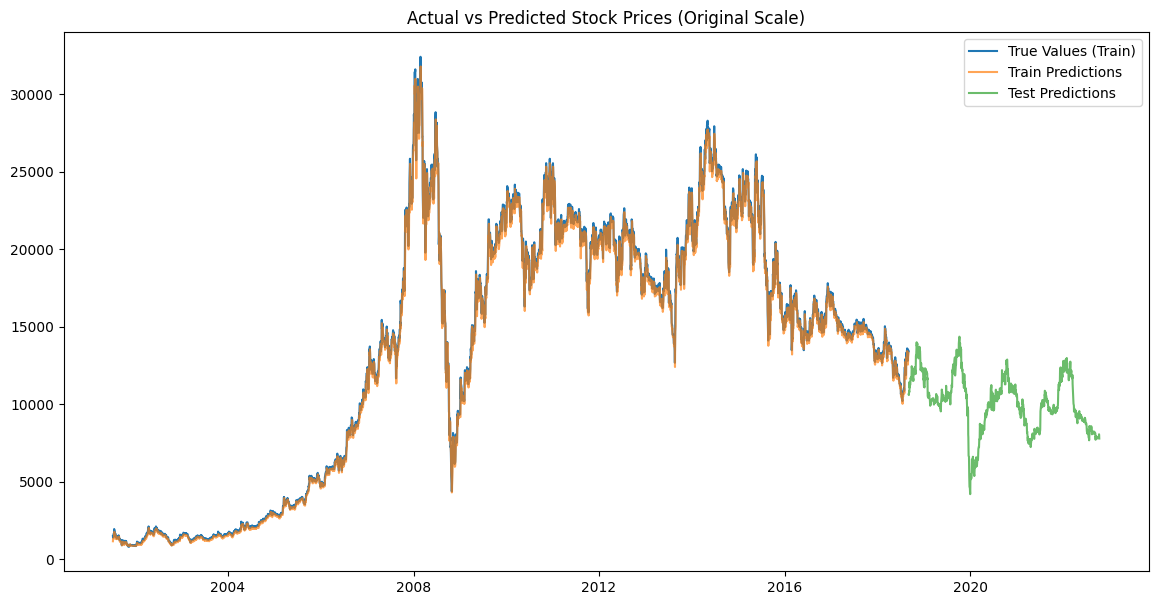

In [ ]:
# Memplot hasil prediksi
plt.figure(figsize=(14, 7))
plt.plot(data_rnn.index[seq_length:seq_length + len(y_train_actual)], y_train_actual, label='True Values (Train)')
plt.plot(data_rnn.index[seq_length:seq_length + len(train_predictions)], train_predictions, label='Train Predictions', alpha=0.7)
plt.plot(data_rnn.index[seq_length + len(train_predictions):seq_length + len(train_predictions) + len(test_predictions)], test_predictions, label='Test Predictions', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Stock Prices (Original Scale)')
plt.show()

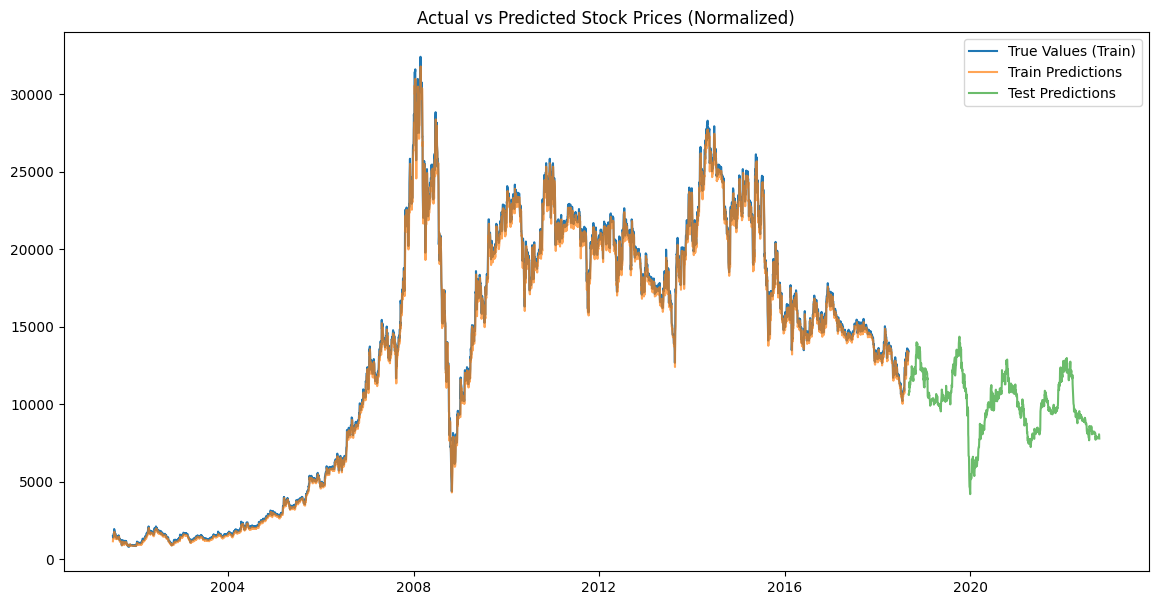

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data_rnn.index[seq_length:seq_length + len(y_train_actual)], y_train_actual, label='True Values (Train)')
plt.plot(data_rnn.index[seq_length:seq_length + len(train_predictions)], train_predictions, label='Train Predictions', alpha=0.7)
plt.plot(data_rnn.index[seq_length + len(train_predictions):seq_length + len(train_predictions) + len(test_predictions)], test_predictions, label='Test Predictions', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Stock Prices (Normalized)')
plt.show()